In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:


class HamiltonianNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(HamiltonianNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)





In [3]:
def generate_data():
    # Simulate double pendulum and generate data
    # Replace this with actual data generation code
    states = torch.rand(1000, 4)  # [theta1, theta2, p1, p2]
    d_states = torch.rand(1000, 4)  # [d(theta1)/dt, d(theta2)/dt, d(p1)/dt, d(p2)/dt]
    return states, d_states


In [4]:

def train_hnn(model, data, epochs=1000, lr=0.001):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    states, d_states = data
    states = states.requires_grad_(True)
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        H = model(states)
        dH_dq = torch.autograd.grad(H.sum(), states, create_graph=True)[0]
        loss = ((d_states - dH_dq) ** 2).mean()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')
    return losses

input_dim = 4  # [theta1, theta2, p1, p2]
hidden_dim = 64
output_dim = 1  # Hamiltonian

In [5]:

# Initialize model
hnn = HamiltonianNN(input_dim, hidden_dim, output_dim)

# Generate data
data = generate_data()


In [6]:
# Train model
losses = train_hnn(hnn, data)



Epoch 0, Loss: 0.346996009349823


Epoch 100, Loss: 0.08391404896974564


Epoch 200, Loss: 0.0833151564002037


Epoch 300, Loss: 0.08312319219112396


Epoch 400, Loss: 0.08303292095661163


Epoch 500, Loss: 0.08297569304704666


Epoch 600, Loss: 0.0829182118177414


Epoch 700, Loss: 0.08284591883420944


Epoch 800, Loss: 0.08278187364339828


Epoch 900, Loss: 0.08274039626121521


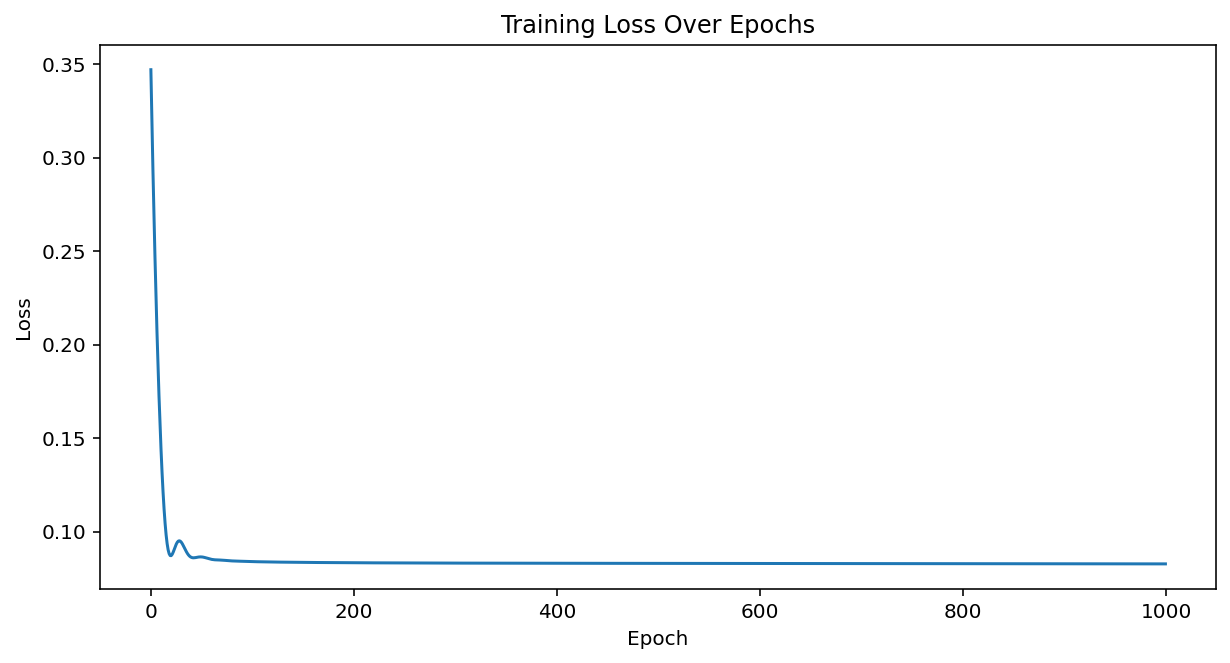

In [7]:
# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()
